<a href="https://colab.research.google.com/github/ryosinaga/Image-Classification-Of-Orange-Types-Using-CNN-/blob/master/Classification_Income_82_Accuracy_Using_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


## **Read Data Set ? to 0 or null**


In [ ]:
missing_val = '?'
data = pd.read_csv('/content/drive/My Drive/adult.csv',na_values = missing_val) 
data.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Analyze data information

In [ ]:
print('Ukuran data : ', data.shape)


Ukuran data :  (32561, 15)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Missing Values (NaN)**

In [ ]:
data.loc[data['workclass'].isnull()==True,['workclass','occupation','native.country']]

,workclass,occupation,native.country
0,NaN,NaN,United-States
2,NaN,NaN,United-States
14,NaN,NaN,United-States
24,NaN,NaN,United-States
44,NaN,NaN,United-States
...,...,...,...
32533,NaN,NaN,United-States
32534,NaN,NaN,United-States
32541,NaN,NaN,United-States
32543,NaN,NaN,United-States


In [ ]:
le = round((1-(len(data.dropna())/len(data)))*100,2)
print('The Percentage of Rows that were removed while handling missing values : {0} %'.format(le))

The Percentage of Rows that were removed while handling missing values : 7.37 %


In [ ]:
data.dropna(inplace = True)

# **Visualizations**

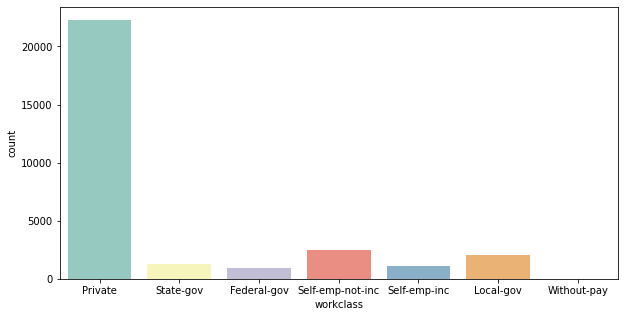

In [ ]:
plt.figure(figsize=(10,5))
sb.countplot(data['workclass'],palette="Set3")
plt.show()

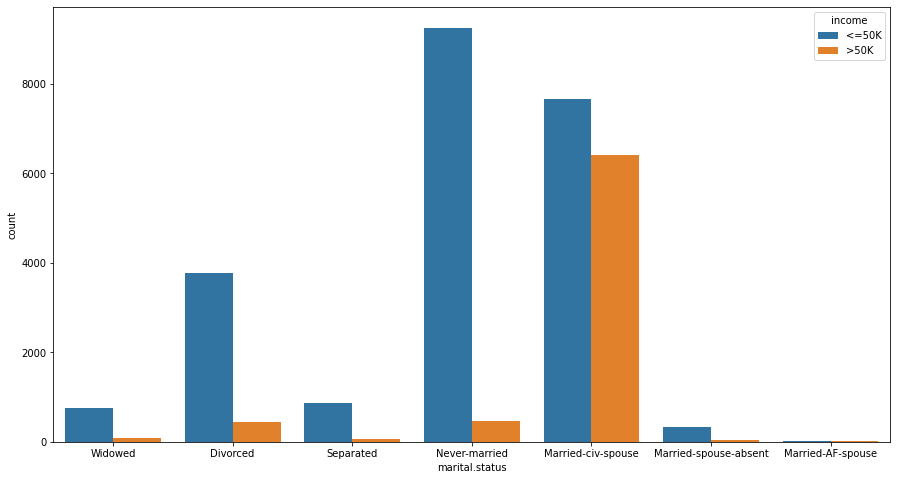

In [ ]:
plt.figure(figsize=(15,8))
sb.countplot(data['marital.status'], hue=data['income']);



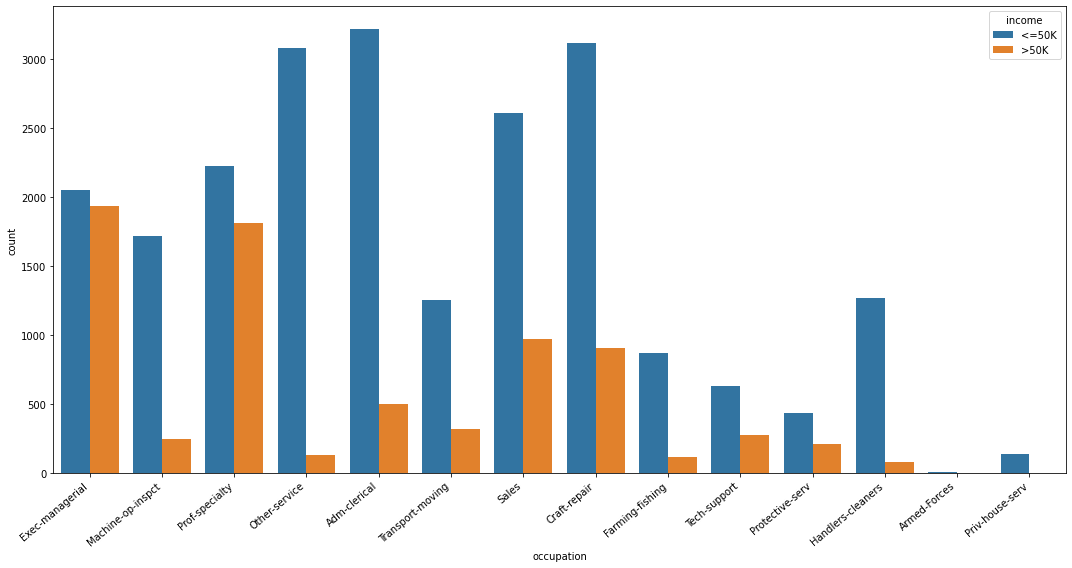

In [ ]:
plt.figure(figsize=(15,8))
ax = sb.countplot(data['occupation'], hue=data['income']);

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

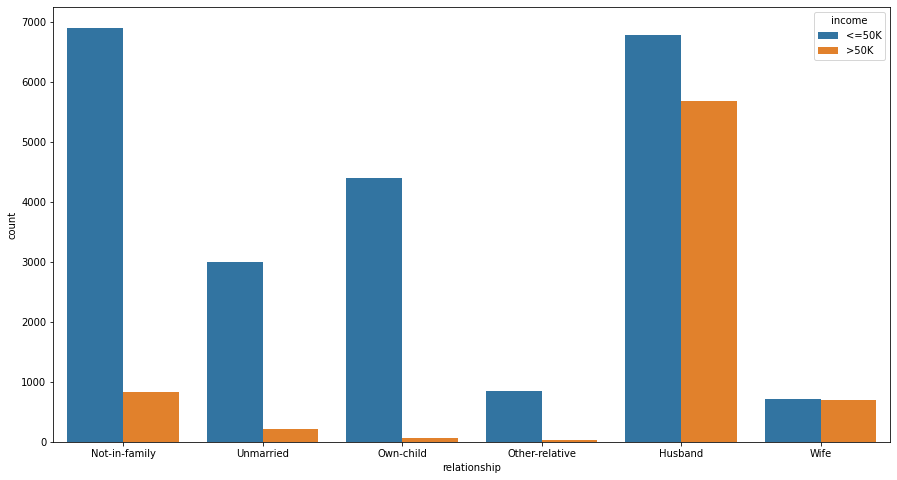

In [ ]:
plt.figure(figsize=(15,8))
sb.countplot(data['relationship'], hue=data['income']);



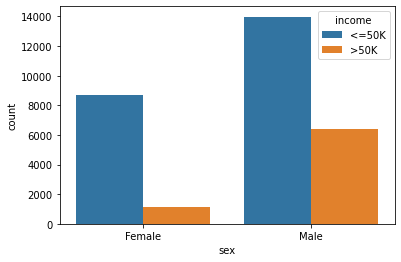

In [ ]:
sb.countplot(data['sex'], hue=data['income']);



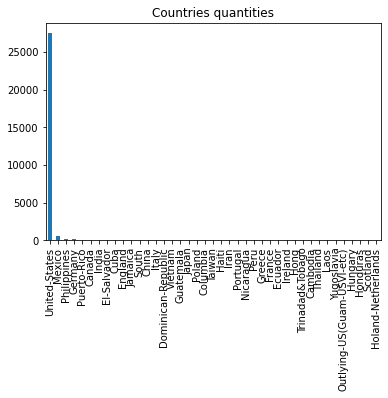

In [ ]:
data['native.country'].value_counts().plot(kind="bar")
ax.set_ylabel("Quantity")
plt.title("Countries quantities")
plt.show()



## **Model Classification using KNN**

In [ ]:
cat = data.select_dtypes(include=['object'])
cat

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
cat_data = pd.DataFrame(encoder.fit_transform(cat), 
                      columns=encoder.get_feature_names(cat.columns))

In [ ]:
num = data.select_dtypes(include=['int64'])

In [ ]:
scaler = StandardScaler()
num_df = pd.DataFrame(scaler.fit_transform(num), 
                      columns = num.columns)



In [ ]:
new_df = pd.concat([num_df, cat_data], axis=1)

In [ ]:
Y = new_df.pop('income_>50K')
X = new_df

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=25)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
##Predicting the test data
y_predict_knn = knn.predict(X_test)



In [ ]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_knn)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_knn))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_knn))

Accuracy score : 0.815891258702619


Confusion matrix :
[[6035  758]
 [ 908 1348]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      6793
         1.0       0.64      0.60      0.62      2256

    accuracy                           0.82      9049
   macro avg       0.75      0.74      0.75      9049
weighted avg       0.81      0.82      0.81      9049

